In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Company Dataset

In [3]:
df= pd.read_csv('Company_Data.csv')
df.head(6)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [4]:
#Data Description

df.shape

(400, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
df['Sales'].mean()

7.496325000000001

In [8]:
df['High']=df.Sales.map(lambda x: 1 if x > 7.49
                        else 0)
df.head(6)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes,1


In [9]:
le= LabelEncoder()

In [10]:
df['ShelveLoc'] = le.fit_transform(df['ShelveLoc'])
df['Urban'] = le.fit_transform(df['Urban'])
df['US'] = le.fit_transform(df['US'])

In [11]:
df.head(6)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
5,10.81,124,113,13,501,72,0,78,16,0,1,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
 11  High         400 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 37.6 KB


In [13]:
x= df.iloc[:,1:11]
y=df['High']

In [14]:
x 

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [15]:
y 

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64

In [16]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,train_size=0.75, random_state=143)

In [17]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [18]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70        48
           1       0.75      0.58      0.65        52

    accuracy                           0.68       100
   macro avg       0.69      0.68      0.68       100
weighted avg       0.69      0.68      0.68       100



In [19]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.68


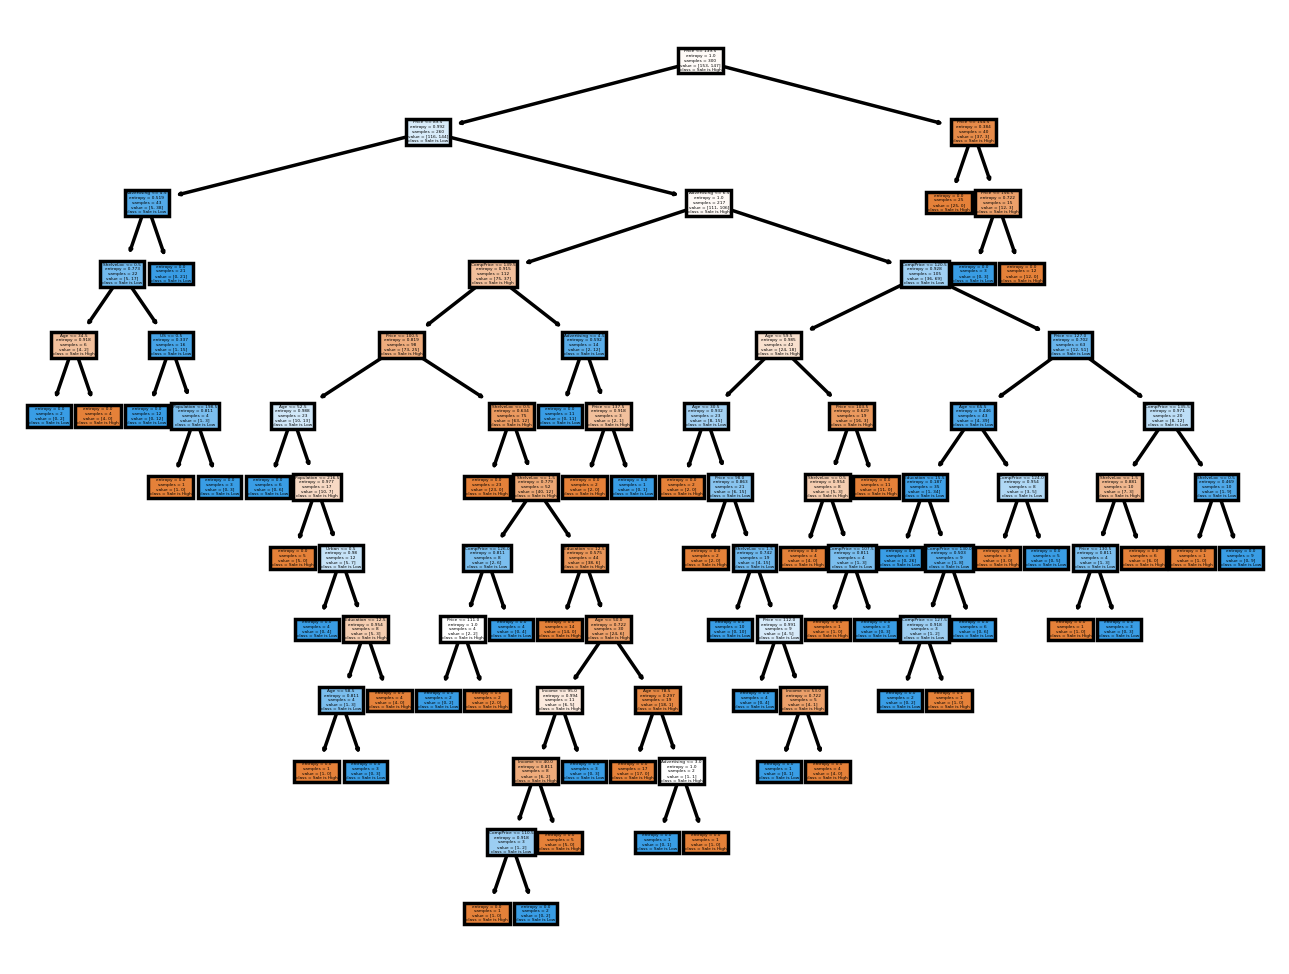

In [20]:
plt.rcParams['figure.dpi'] = 250

tree.plot_tree(dt, feature_names=x.columns, 
               class_names=['Sale is High','Sale is Low'],
              filled=True)
plt.show()

In [21]:
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [22]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        48
           1       0.73      0.79      0.76        52

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100



In [23]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.74


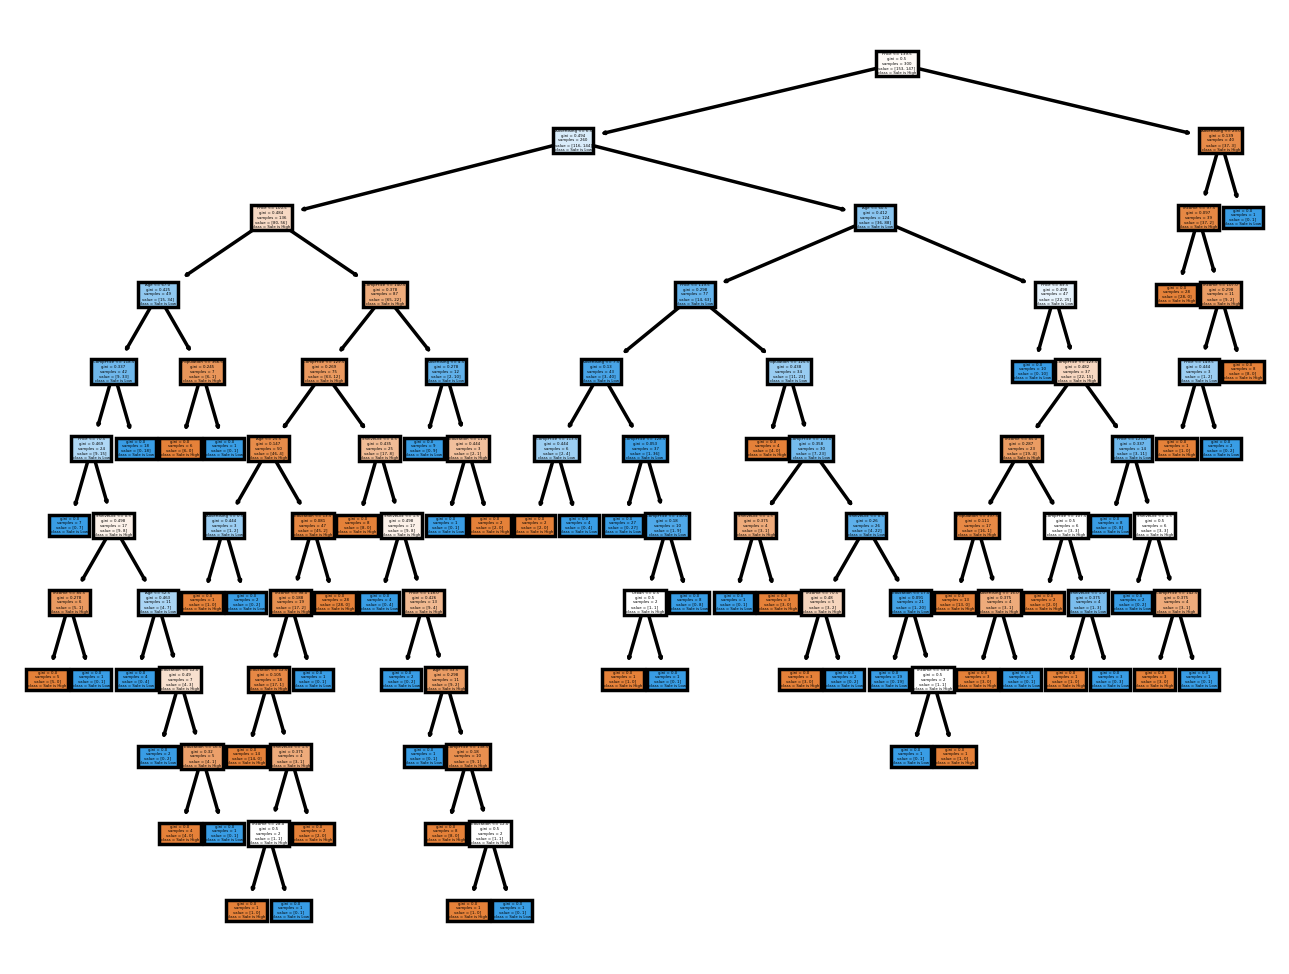

In [24]:
plt.rcParams['figure.dpi'] = 250

tree.plot_tree(dt, feature_names=x.columns, 
               class_names=['Sale is High','Sale is Low'],
              filled=True)

plt.show()

# Hyperparameter Tunning

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
dt= DecisionTreeClassifier()

param= {
    'criterion': ['gini','entropy'],
    'splitter':['random','best'],
    'max_depth':[1,2,3,4,5,6],
     'class_weight':['balanced']
}

In [27]:
grid= GridSearchCV(DecisionTreeClassifier(),param)

In [28]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'splitter': ['random', 'best']})

In [29]:
grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 6,
 'splitter': 'best'}

In [30]:
dt = DecisionTreeClassifier(criterion='gini',class_weight='balanced',
                           max_depth=6, splitter='random',random_state=10)

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [31]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  0.84
Testing Accuracy:  0.81


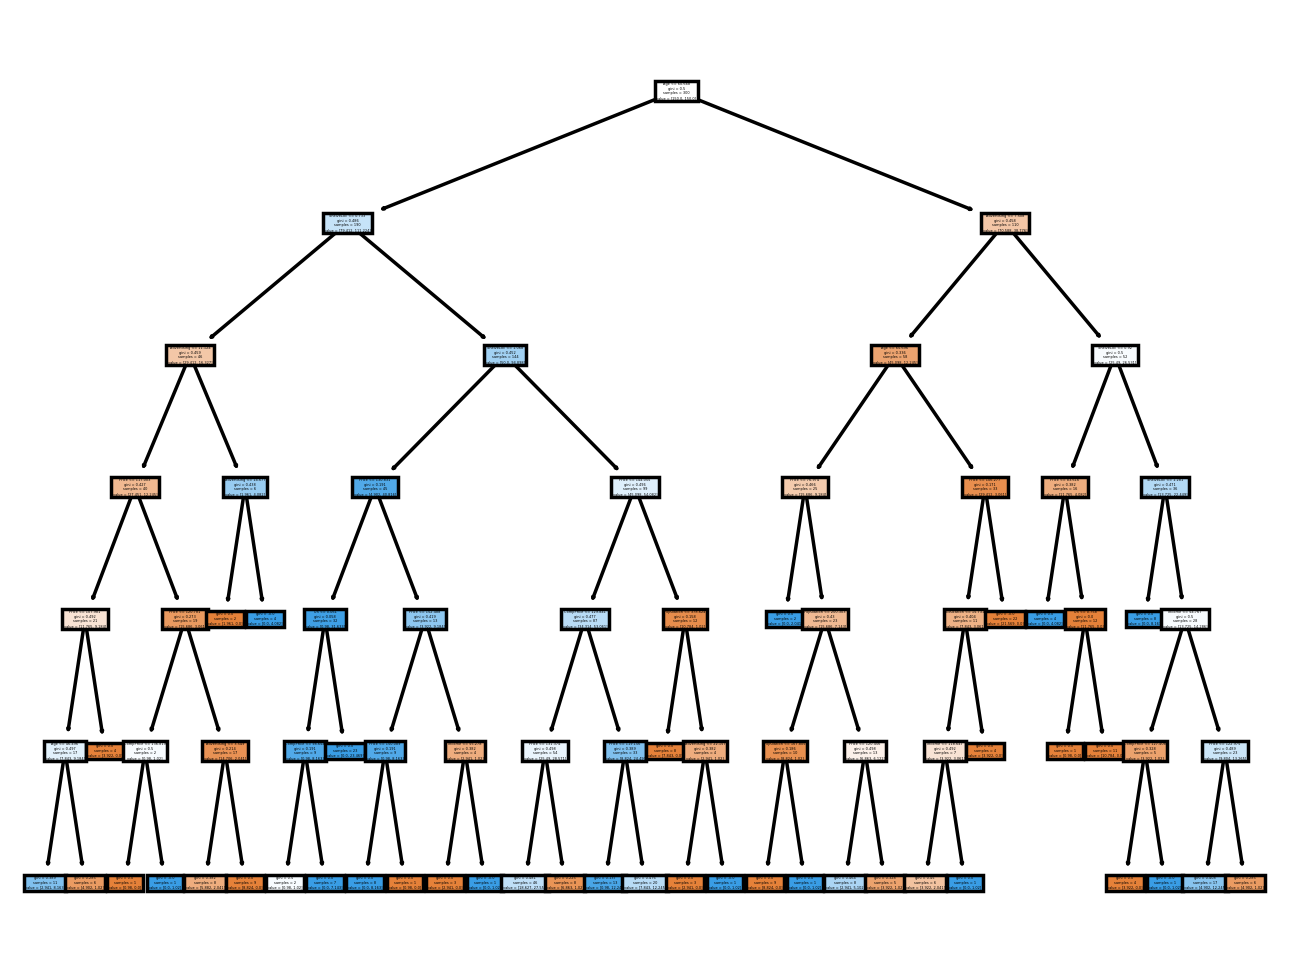

In [32]:
tree.plot_tree(dt, feature_names=x.columns, filled=True)
plt.show()

# Fraud Dataset

In [33]:
df= pd.read_csv('Fraud_check.csv')
df.head(6)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO


In [34]:
df.shape

(600, 6)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [36]:
df.rename({'Marital.Status':'MS','Taxable.Income':'tax',
              'City.Population':'city_pop','Work.Experience':'Work'},inplace=True, axis=1)
df.head(6)

,Undergrad,MS,tax,city_pop,Work,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO


In [37]:
df['tax']=df.tax.map(lambda x: 'Risky' if x <=30000
                        else 'Good')
df.head(6)

,Undergrad,MS,tax,city_pop,Work,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
5,NO,Divorced,Good,116382,0,NO


In [38]:
df['Undergrad'] = le.fit_transform(df['Undergrad'])
df['MS'] = le.fit_transform(df['MS'])
df['Urban'] = le.fit_transform(df['Urban'])
df['tax']=le.fit_transform(df['tax'])

In [39]:
df.head(6)

,Undergrad,MS,tax,city_pop,Work,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
5,0,0,0,116382,0,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Undergrad  600 non-null    int64
 1   MS         600 non-null    int64
 2   tax        600 non-null    int64
 3   city_pop   600 non-null    int64
 4   Work       600 non-null    int64
 5   Urban      600 non-null    int64
dtypes: int64(6)
memory usage: 28.2 KB


In [41]:
x=df.iloc[:,[0,1,3,4,5]]
y=df['tax']

In [42]:
x

,Undergrad,MS,city_pop,Work,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [43]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: tax, Length: 600, dtype: int64

In [44]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,train_size=0.75, random_state=143)

In [45]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [46]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       118
           1       0.08      0.09      0.09        32

    accuracy                           0.59       150
   macro avg       0.41      0.41      0.41       150
weighted avg       0.60      0.59      0.60       150



In [47]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.5866666666666667


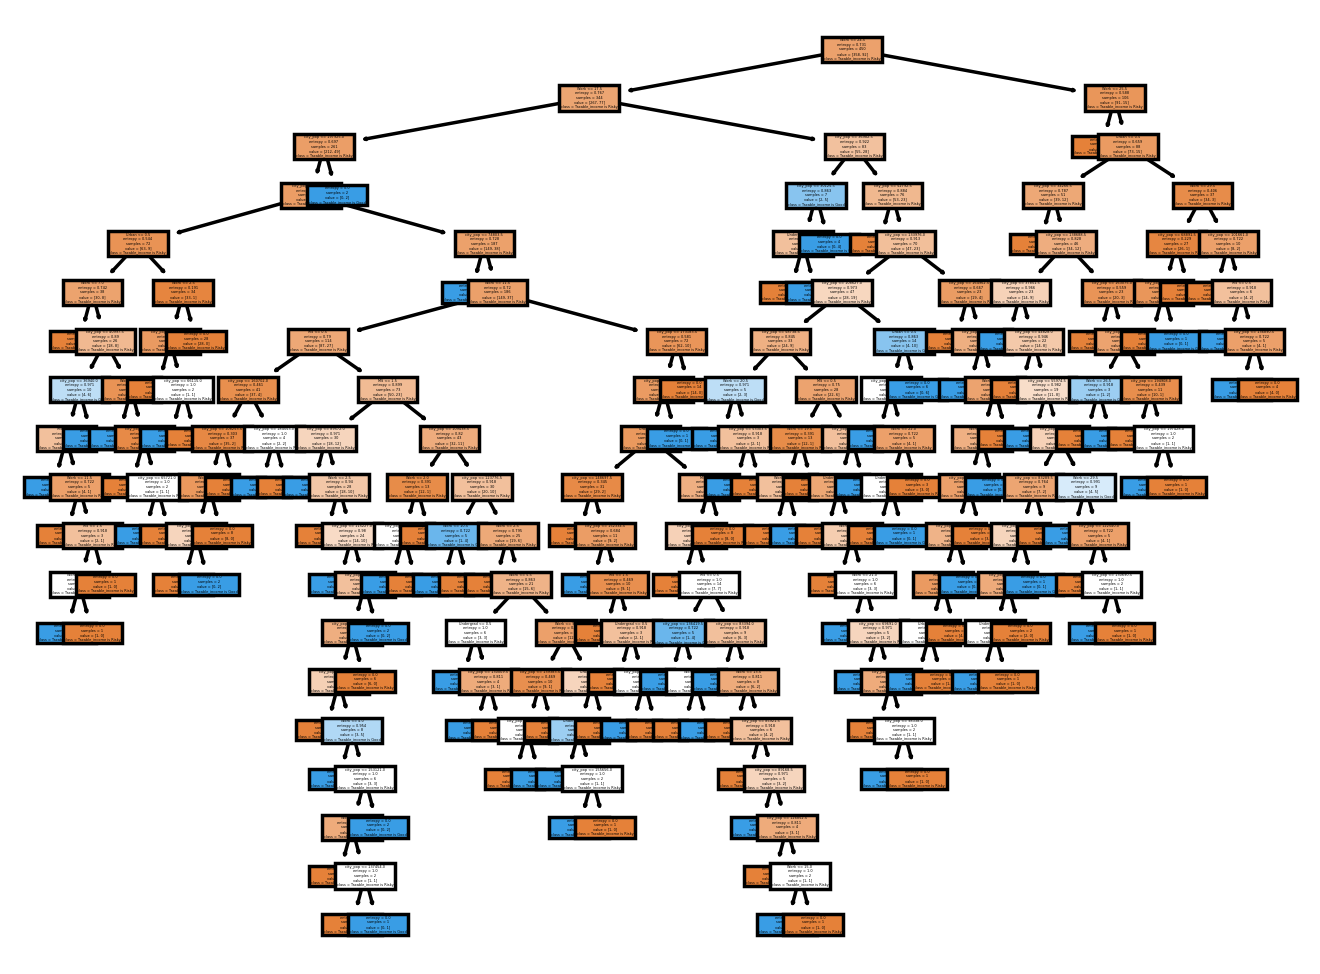

In [48]:
plt.rcParams['figure.dpi'] = 250

tree.plot_tree(dt, feature_names=x.columns, 
               class_names=['Taxable_income is Risky', 'Taxable_income is Good'],
              filled=True)
plt.show()

In [49]:
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [50]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       118
           1       0.09      0.09      0.09        32

    accuracy                           0.61       150
   macro avg       0.42      0.42      0.42       150
weighted avg       0.61      0.61      0.61       150



In [51]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.6066666666666667


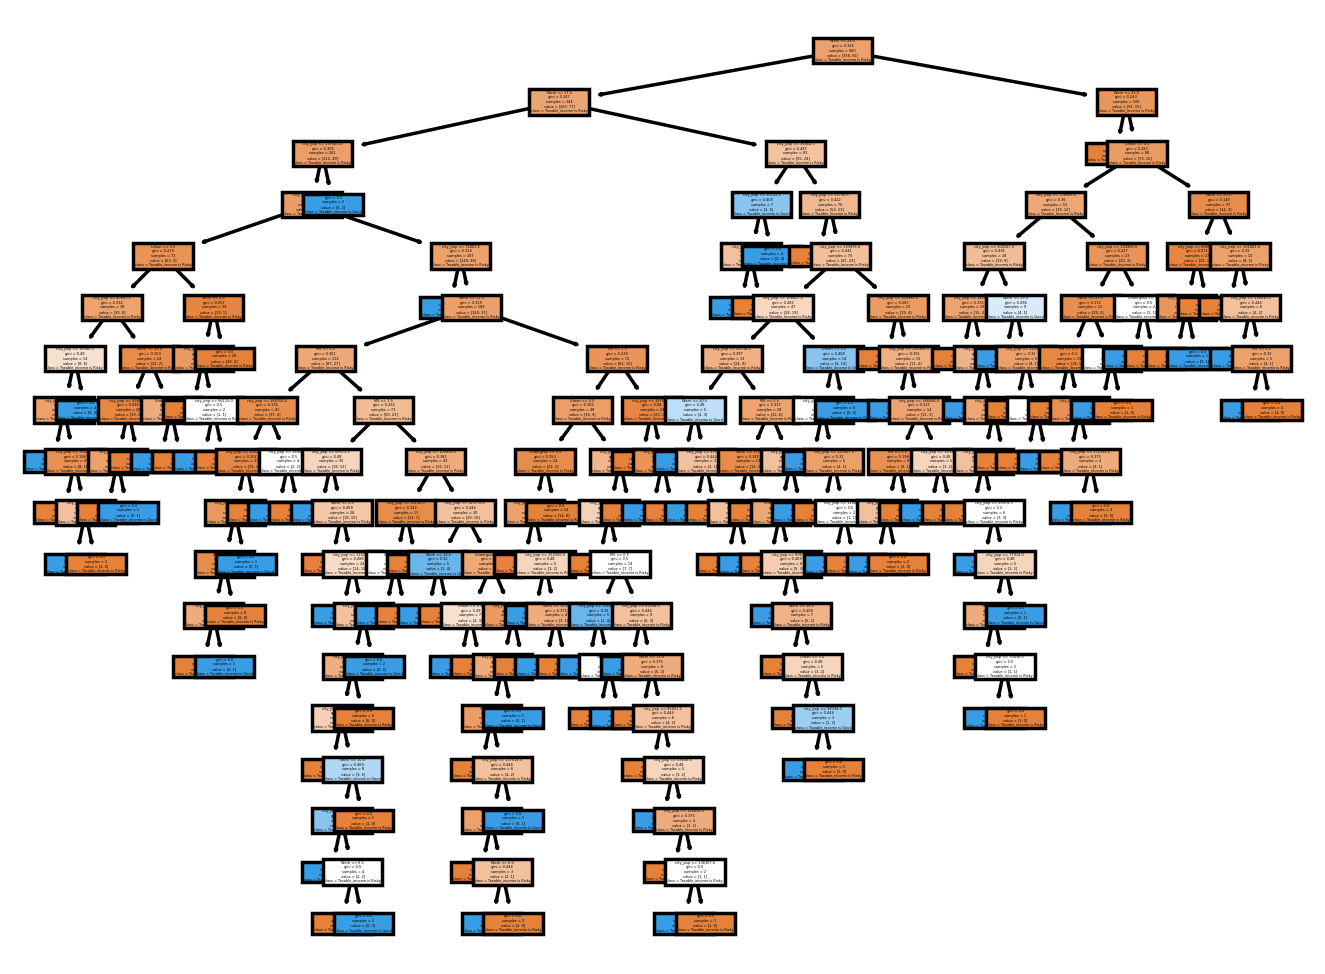

In [52]:
tree.plot_tree(dt, feature_names=x.columns, 
               class_names=['Taxable_income is Risky', 'Taxable_income is Good'],
              filled=True)
plt.show()

# Hyperparameter Tunning

In [53]:
dt= DecisionTreeClassifier()

param= {
    'criterion': ['gini','entropy'],
    'splitter':['random','best'],
    'max_depth':[2,4,6,8,10,12,14,16,18],
     'class_weight':['balanced']
}

In [54]:
grid= GridSearchCV(DecisionTreeClassifier(),param)

In [55]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'splitter': ['random', 'best']})

In [56]:
grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 18,
 'splitter': 'random'}

In [57]:
dt = DecisionTreeClassifier(criterion='gini',class_weight='balanced',
                           max_depth=2, splitter='best')

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [58]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  0.7355555555555555
Testing Accuracy:  0.6333333333333333


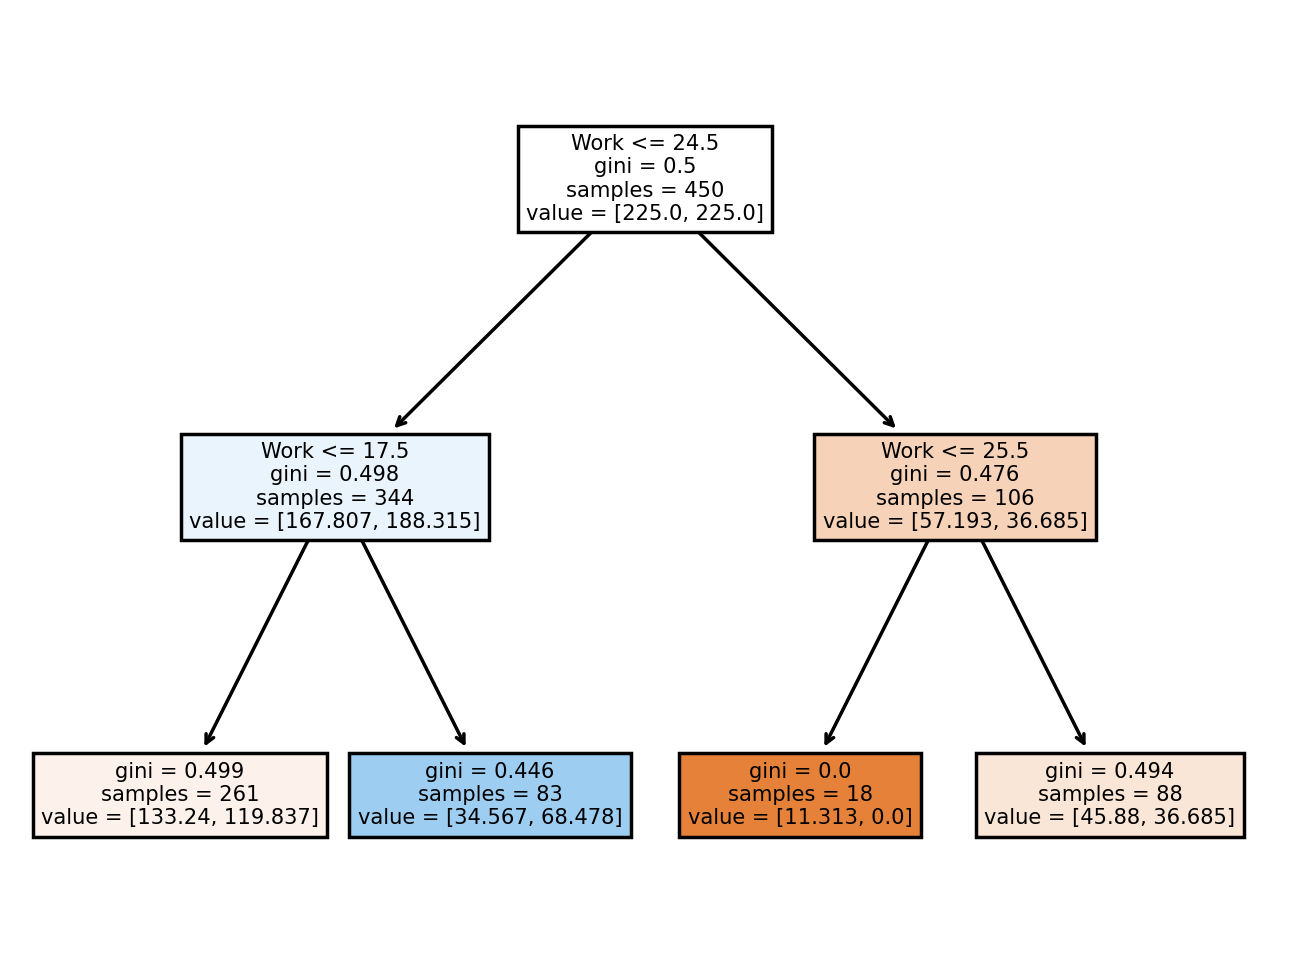

In [59]:
tree.plot_tree(dt, feature_names=x.columns, filled=True)
plt.show()